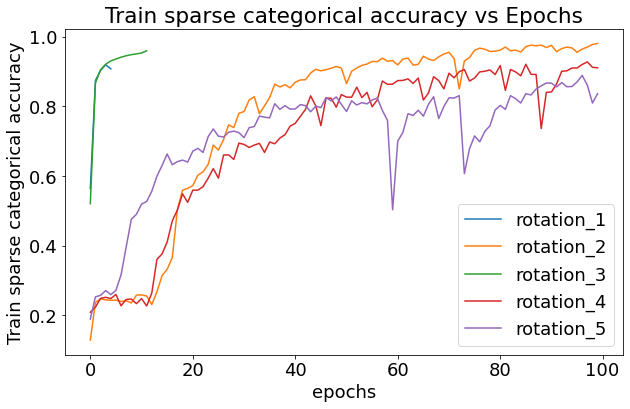

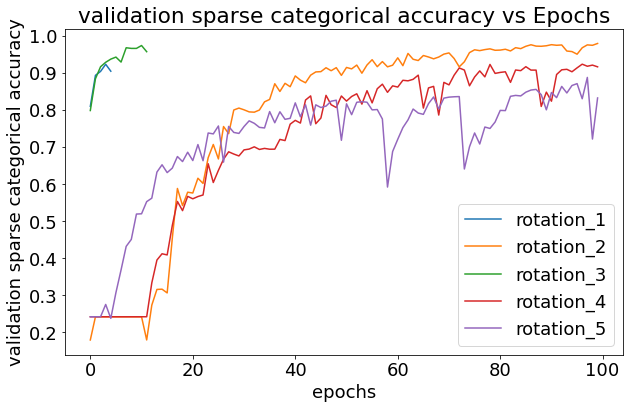

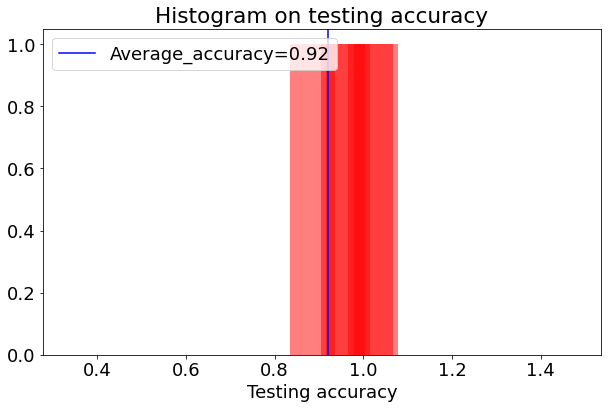

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import os
import fnmatch
import time
import pickle
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.models import Sequential
import matplotlib.patches as mpatches
from statistics import mean

def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''

    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []
    

    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    return results

 # Default tick label size
# Default plotting parameters
FIGURESIZE=(10,6)
FONTSIZE=18

plt.rcParams['figure.figsize'] = FIGURESIZE
plt.rcParams['font.size'] = FONTSIZE

plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE
#network
filebase1 = "historyn_*.pkl"
hist = read_all_rotations("results", filebase1)
filebase2 = "evaluationn_*.pkl"
test = read_all_rotations("results", filebase2)


#train figure
for i in range(len(hist)):
    plt.plot(hist[i]["sparse_categorical_accuracy"], label="rotation_"+str(i+1))
plt.ylabel('Train sparse categorical accuracy')
plt.xlabel('epochs')
plt.title('Train sparse categorical accuracy vs Epochs')
plt.legend()
plt.savefig("Training_spa_acc.png")
plt.show()
plt.close()

#validation figure
for i in range(len(hist)):
    plt.plot(hist[i]["val_sparse_categorical_accuracy"], label="rotation_"+str(i+1))
plt.ylabel('validation sparse categorical accuracy')
plt.xlabel('epochs')
plt.title('validation sparse categorical accuracy vs Epochs')
plt.legend()
plt.savefig("valid_spa_acc.png")
plt.show()
plt.close()

#finding the average test accuracy
acc=[]
for i in range(len(test)):
    acc.append(test[i][1])

avg_acc = round(mean(acc),2)

#test histogram
for i in range(5):
    plt.hist(acc[i],alpha=0.5,color='red')
plt.axvline(x = avg_acc, color='b', label = "Average_accuracy="+str(avg_acc))
plt.xlabel('Testing accuracy')
plt.title('Histogram on testing accuracy')
plt.legend()
plt.savefig("histogram_accuracy.png")
plt.show()
plt.close()


